<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos · PEC3</p>
<p style="margin: 0; text-align:right;">2020-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 3: Métodos supervisados

A lo largo de esta práctica veremos como aplicar distintos algoritmos supervisados
así como algunas de sus aplicaciones reales:

 - **kNN (K Nearest Neighbors)**: Valoración de los usuarios sobre una determinada APP. 
 - **SVM (Support Vector Machine)**: Reconocimiento de caras.
 - **Árboles de decisión**: Predicción de venta de sillas infantiles.
 - **Naive-Bayes**: ¿Comprar o alquilar una casa? ¿Que es lo que más me conviene?
 - **Y por último estudiaremos las distintas fronteras de decisión de los distintos algoritmos**

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Nombre y apellidos:</strong>
</div>

Stefanie Kobsar Rodriguez

---

Para ello vamos a necesitar las siguientes librerías:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
import statsmodels.api as sm

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Preprocesado y modelado KNN
from sklearn.neighbors import KNeighborsClassifier

# Preprocesado y modelado del SVM
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_circles
from mpl_toolkits import mplot3d
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
# use seaborn plotting defaults
import seaborn as sns; sns.set()

# Preprocesado y modelado de Naive-Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

# Preprocesado y modelado Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text





# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## 1. kNN (2 puntos)

El objetivo de este primer ejercicio es entender el funcionamiento del kNN, intuir sus principales ventajas o  desventajas y entender la influencia de los parámetros de los que consta. 

K-Nearest Neighbours es un algoritmo basado en instancia de tipo supervisado. Veámos que significa esto: 
 - Supervisado: tenemos etiquetado nuestro conjunto de datos de entrenamiento, con la clase o resultado esperado.
 - Basado en Instancia (Lazy Learning): Esto quiere decir que nuestro algoritmo no aprende explícitamente un modelo (como por ejemplo en Regresión Logística o Árboles de Decisión), si no que memoriza las instancias de entrenamiento que son usadas como “conocimiento” para la fase de predicción.
 
**¿Cómo funciona KNN?**
- Calculamos la distancia entre el item a clasificar y el resto de items del dataset de entrenamiento.
- Seleccionamos los “k” elementos más cercanos, es decir con menor distancia, según la distancia que usemos (euclídea, coseno, manhattan..).
- Por último realizamos una “votación de mayoría” entre los k puntos: los de una clase/etiqueta que "dominen" decidirán su clasificación final.
 

Para nuestro ejercicio tomaremos 257 registros con opiniones de usuarios sobre una app (reviews_sentiment.csv). Utilizaremos en este caso 2 columnas de datos como valores de entrada para el algoritmo. Vamos a tomar sólo dos características para poder facilitar la visualización. 
Las columnas que utilizaremos serán: *wordcount* con la cantidad de palabras utilizadas y *sentimentValue* con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo. 
Nuestras etiquetas serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5. Podemos pensar que si el usuario puntúa con más estrellas, tendrá un sentimiento positivo, pero no necesariamente siempre es así, eso tendréis que descubrirlo vosotr@s.

 ### Leemos nuestro archivo de entrada

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> 
Carga el archivo de datos y visualiza los valores
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

In [2]:
path = "/Users/Stephi/Documents/academic/UOC/tercer_semestre/minería/pec_3/reviews_sentiment.csv"
sentiment_df = pd.read_csv(path, sep=';')

sentiment_df.head()

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


In [3]:
sentiment_df = sentiment_df.fillna("NoTitle")

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
wordcount = sentiment_df["wordcount"].tolist()
sentiment_value = sentiment_df["sentimentValue"].tolist()

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


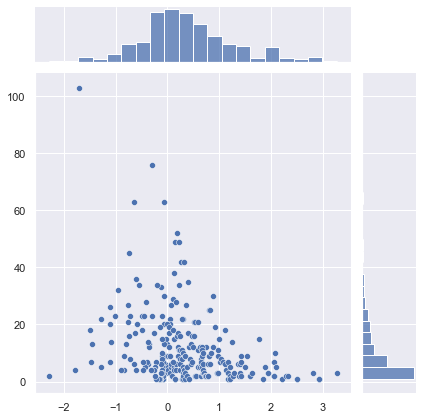

In [5]:
sns.jointplot(sentiment_value, wordcount)
plt.show()

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


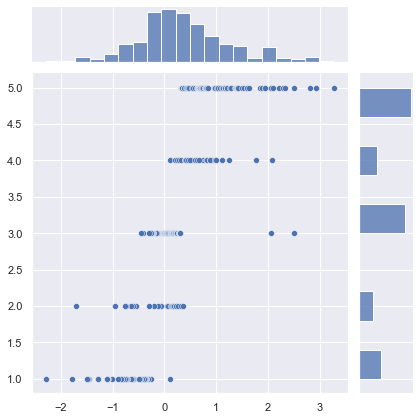

In [6]:
wordcount = sentiment_df["Star Rating"].tolist()
sentiment_value = sentiment_df["sentimentValue"].tolist()
sns.jointplot(sentiment_value, wordcount)
plt.show()

- Se observa un rango de datos fuera de lo esperado. Existen usuarios que han calificado el servicio con 5 estrellas que sin embargo tienen puntuaciones de sentimiento bajas. Hay que investigar porqué sucede eso. 

### EDA Básico

El análisis EDA (Exploratory Data Analysis) es uno de los pasos básicos que tenemos que hacer a la hora de realizar nuestros proyectos de mineria de datos. Usualmente este proceso de análisis involucra muchas ayudas visuales. Mediante este proceso estamos tratando de encontrar:

- La estructura y distribución de nuestros datos
- Las relaciones entre las variables explicatorias
- La relación que tienen las variables explicatorias con la variable respuesta
- Encontrar posibles errores, puntos extremos y anomalías en los datos
- Refinar nuestras hipótesis, o generar nuevas preguntas sobre los datos que tenemos



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> 
 <br>- Calcula los histogramas para las variables <i>Star Rating</i>, <i>wordcount</i> y <i>sentimentValue</i>.
 <br>- Centrémonos en las variables <i>Star Rating</i> y <i>wordcount</i>. Calcula las frecuencias y grafícalas (puedes graficarlo mediante la librería matplotlib o la librería seaborn). 


</div>

<i>Ayuda</i>: En seaborn utilizar FacetGrid y realizar el gráfico como un [factorplot](https://www.emilkhatib.es/representaciones-graficas-con-seaborn) 

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


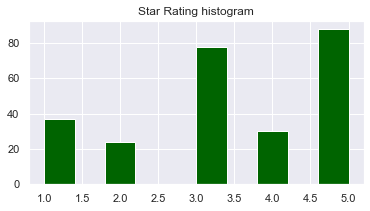

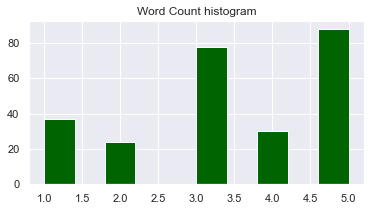

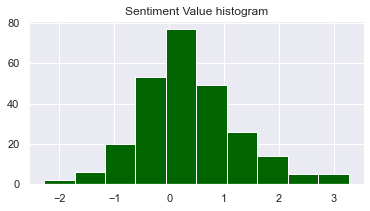

In [7]:
star_rating = sentiment_df["Star Rating"].tolist()

header = [star_rating, wordcount, sentiment_value]
titles = ["Star Rating", "Word Count", "Sentiment Value"]

for head, title in zip(header, titles): 
    fig, ax = plt.subplots(figsize=(6, 3))
    plt.hist(head, color = "darkgreen")
    plt.title(f"{title} histogram")
    
plt.show()

In [8]:
stars = [1, 2, 3, 4, 5]

for star in stars:
    count = star_rating.count(star)
    if star == 1:
        print(f"La frecuencia de {star} estrella es de {count}.")
    else:
        print(f"La frecuencia de {star} estrellas es de {count}.")

La frecuencia de 1 estrella es de 37.
La frecuencia de 2 estrellas es de 24.
La frecuencia de 3 estrellas es de 78.
La frecuencia de 4 estrellas es de 30.
La frecuencia de 5 estrellas es de 88.


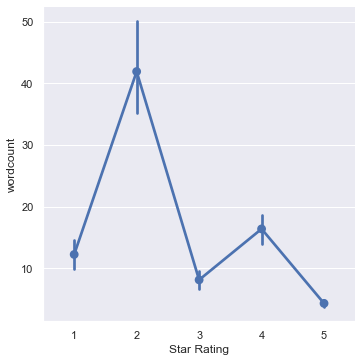

In [9]:
sns.catplot(x="Star Rating", y="wordcount", data=sentiment_df, kind="point")
plt.show()

- wordcount vs star: Se puede ver como los usuarios que más comentan son aquellos que han calificado el servicio con 2 estrellas. Los usuarios con 5 estrellas no dejan comentarios. 

- histograma sentiment value: distribución normal, campana desplazada a la derecha tendencia a dejar comentarios cuando opinion positiva.

- wordcount histogram: Las reviews con entre 0-10 palabras se observa que tienen alta frecuencia. Esto quiere decir que muchos de los usuarios no comentan. 

Es difícil pues correlacionar de manera causal workcount, pero se pueden sacar conclusiones interesantes sobre el análisis de Star Rating vs el resto de variables. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué se interpreta de las gráficas anteriores? 
    
<strong>Opcional</strong> (+0.1 puntos extra) ¿Harías algún análisis más? En caso afirmativo realízalo y coméntalo.  
</div>

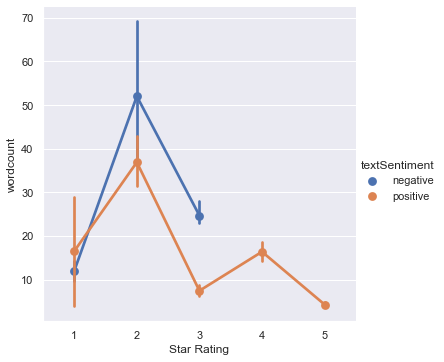

In [84]:
sns.catplot(x="Star Rating", y="wordcount", hue="textSentiment", data=sentiment_df, kind="point")
plt.show()

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


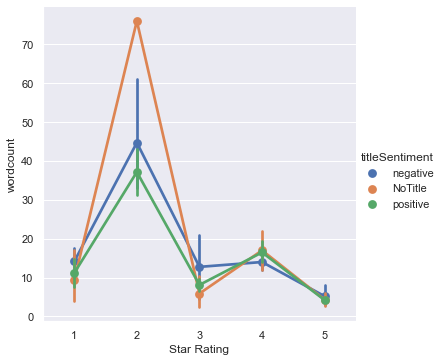

In [85]:
sns.catplot(x="Star Rating", y="wordcount", hue="titleSentiment", data=sentiment_df, kind="point")
plt.show()

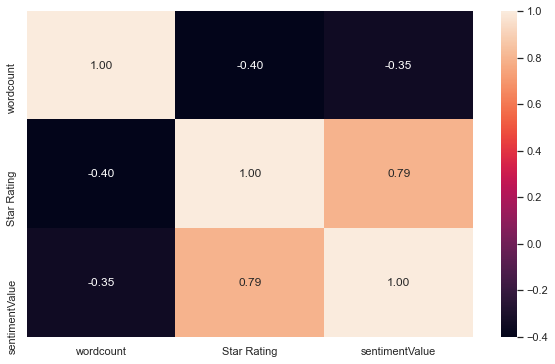

In [83]:
from pylab import rcParams

def plot_correlation(data):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    # init figure size
    fig, ax = plt.subplots(figsize=(10, 6))    
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    fig.savefig('corr.png')

# plot correlation & densities
plot_correlation(sentiment_df)

- Se observa una correlación elevada entre Star Rating y sentiment value. Esto a priori entra dentro de lo esperado. 

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

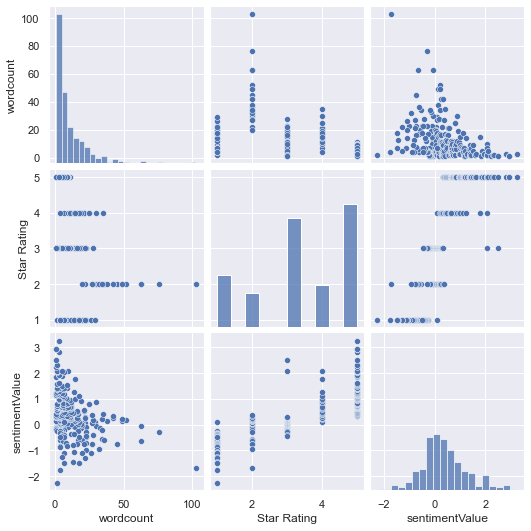

In [11]:
sns.pairplot(sentiment_df)
plt.show()

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


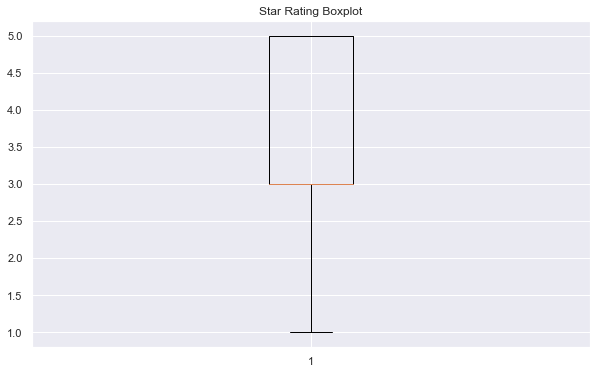

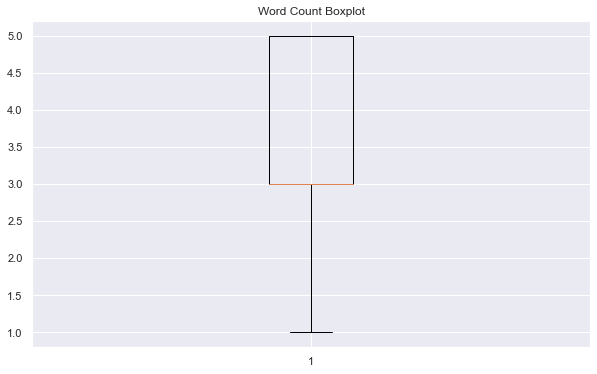

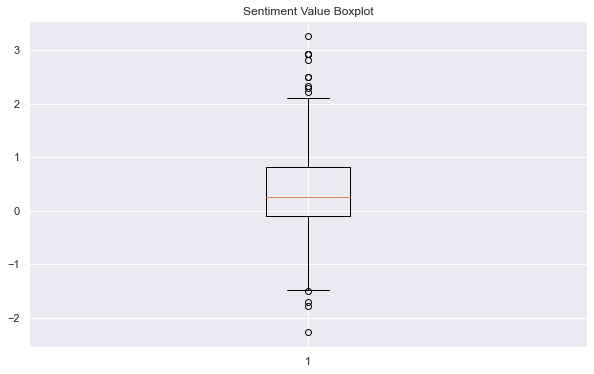

In [12]:
for head, title in zip(header, titles):
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.boxplot(head)
    plt.title(f"{title} Boxplot")
plt.show()

### Construcción del modelo
Vamos a construir nuestro kNN. Para ello dividiremos el set de datos en entrenamiento y test y utilizaremos k = 7

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> <br>
- Divide el dataset en train/test <br>
- Crea el modelo kNN con k= 7 y calcula su accuracy tanto en training como en test <br>
- Calcula la predicción, calcula y grafica la matriz de confusión. Crea un report sobre el conjunto de test mediante <i>classification_report</i>
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

In [15]:
sentiment_df.head()

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NoTitle,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NoTitle,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


In [16]:
sentiment_knn = sentiment_df.drop(columns=["Review Title", "titleSentiment", "textSentiment", "Review Text"])

sentiment_knn.head()


/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,wordcount,Star Rating,sentimentValue
0,23,1,-0.486389
1,20,1,-0.586187
2,4,1,-0.602240
3,17,1,-0.616271
4,6,1,-0.651784


In [17]:

scaler = MinMaxScaler()
sentiment_knn_scaled = scaler.fit_transform(sentiment_knn)
sentiment_knn_scaled = pd.DataFrame(sentiment_knn_scaled)
sentiment_knn_scaled.columns = ['wordcount',  "StarRating", "sentimentValue"]
sentiment_knn_scaled.head()

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,wordcount,StarRating,sentimentValue
0,0.215686,0.0,0.323058
1,0.186275,0.0,0.305047
2,0.029412,0.0,0.302150
3,0.156863,0.0,0.299618
4,0.049020,0.0,0.293209


In [18]:
y = sentiment_knn["Star Rating"].to_numpy()
X = sentiment_knn_scaled.drop(columns=["StarRating"]).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
list_variables_dataset = [X_test, X_train, y_test, y_train]

print("Shape of X_test: ", X_test.shape)
print("Shape of X_train: ", X_train.shape)
print("Shape of y_test: ", y_test.shape)
print("Shape of y_train: ", y_train.shape)

Shape of X_test:  (52, 2)
Shape of X_train:  (205, 2)
Shape of y_test:  (52,)
Shape of y_train:  (205,)


In [20]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [21]:
knn.score(X_test, y_test) #accuracy

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8846153846153846

In [22]:
pred = knn.predict(X_test)
confusion_matrix(pred, y_test)

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 8,  0,  0,  0,  0],
       [ 0,  2,  1,  1,  0],
       [ 0,  1, 15,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  1,  2, 18]])

El numero de verdaderos positivos es elevado ya que los numero más grandes se encuentran en la diagonal de la matriz de confusión. 

- Ranting 2 falla bastante --> wordcount alto

### Dibuja las fronteras de decisión
Dibujamos las fronteras de decisión <br>
En este caso hemos llamado al modelo kNN como clf

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


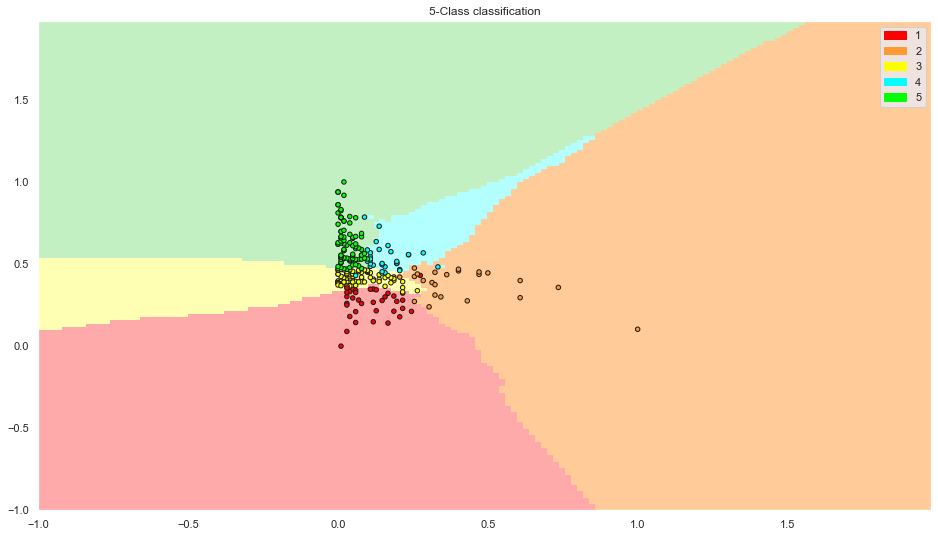

In [23]:
h = .02  # Tamaño de la malla

# Definimos colores
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# Modelo kNN
clf = KNeighborsClassifier(n_neighbors=7, weights='distance')

clf.fit(X, y)

# Frontera de decision. Asignamos a cada punto de la malla [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

raveledXX = xx.ravel()
raveledYY = yy.ravel()

concatenated = np.c_[raveledXX, raveledYY]

Z = clf.predict(concatenated)

# Grafico
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# tTambién graficamos los puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

plt.title("5-Class classification")

plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Viendo la frontera de decisión, analiza sus resultados. ¿Qué características podemos intuir de los usuarios que usan y valoran la app?
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

Se puede intuir a través de la visualización de la frontera de decisión que los usuarios satisfechos forman un cluster homogéneo con distancias pequeñas entre ellos. Esto es debido a la ausencia de comentarios. 

Los datos de los clientes con una y dos estrellas se encuentran más dispersos y es más difícil determinar un tendencia y clasificarlos. Creo que cabría hacer un análisis cualitativo del contenido de las reviews para ahondar un poco más. 

### Vamos a elegir el mejor valor de K


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> En anteriores apartados realizamos nuestro modelo con k = 7, es decir con 7 vecinos. Para ello ejecuta el algortimo kNN para valores que varían entre 1 y 20 y grafícalos. Comenta a partir de la gráfica que valor o valores de k serían los más óptimos en este caso. 
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

In [24]:
k_range = range (1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = accuracy_score(y_test, y_pred)
    scores_list.append(accuracy_score(y_test, y_pred))

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


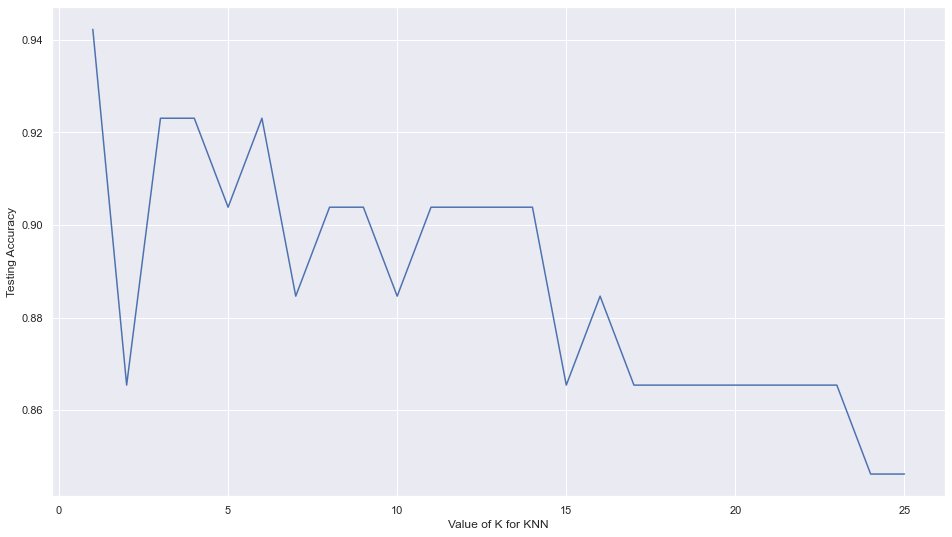

In [25]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

Se observa que la precisión en la clasificación disminuye a medida que hacemos aumentar el valor de k. El valor k = 1 es el que da una mayor precisión en la predicción del algoritmo. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> <br>
- Viendo los resultados, ¿cuáles son las ventajas e inconvenientes del algoritmo kNN? <br>
- ¿Para qué tipo de aplicaciones crees que sería idóneo utilizar este algoritmo? Razona la respuesta.
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

Ventajas del algoritmo KNN:

- Clasificación de variables categóricas
- Predicción de nuevos valores
- Método no paramétrico
- Algoritmo simple y rápido
- Insensible a los valores atípicos

Desventajas:

- Aprendizaje computacionalmente costoso (lazy learning)
- Depende de la función de distancia y del valor de K hace que no sea práctico en datasets muy grandes 
- Sensible al ruido 
- Sensible a la reducción de dimensionalidad. 

    
    

Este algoritmo es idóneo para funcionalidades como la recomendación de contenido audiovisual, como puede ser el caso de Netlfix y Spotify. 

#### Ejercicio opcional (+0.5 puntos) 
A lo largo del ejercicio se han visto dos puntos que no son buenos para los algoritmos. El primero lo hemos visto al realizar el gráfico de la valoración de la app (Star_rating). Hemos visto que las distintas valoraciones no estaban balanceadas. El segundo punto era el número de opiniones negativas, neutras o positivas. En este caso tampoco estaban balanceadas. <br>
Se propone como ejercicio opcional realizar un balanceo con el algoritmo SMOTE y repetir los resultados del ejercicio kNN ya realizado. <br>
<i><b>Ayuda</b></i>: <br>
[enlace1](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) <br>
[enlace2](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html) <br>
Os aconsejamos la implementación de SMOTE de la librería [**imlearn**](https://pypi.org/project/imblearn/0.0/)


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

# 2. Support Vector Machines (SVM) (1.5 puntos)
Las Máquinas de Vector Soporte se fundamentan en el Maximal Margin Classifier, que a su vez, se basa en el concepto de hiperplano. <br>

En un espacio p-dimensional, un hiperplano se define como un subespacio plano y afín de dimensiones p−1. El término afín significa que el subespacio no tiene por qué pasar por el origen. En un espacio de dos dimensiones, el hiperplano es un subespacio de 1 dimensión, es decir, una recta. En un espacio tridimensional, un hiperplano es un subespacio de dos dimensiones, un plano convencional. Para dimensiones p>3 no es intuitivo visualizar un hiperplano, pero el concepto de subespacio con p−1 dimensiones se mantiene. <br>

La definición de hiperplano para casos perfectamente separables linealmente resulta en un número infinito de posibles hiperplanos, lo que hace necesario un método que permita seleccionar uno de ellos como clasificador óptimo. <br>

La solución a este problema consiste en seleccionar como clasificador óptimo al que se conoce como maximal margin hyperplane o hiperplano óptimo de separación, que se corresponde con el hiperplano que se encuentra más alejado de todas las observaciones de entrenamiento. Para obtenerlo, se tiene que calcular la distancia perpendicular de cada observación a un determinado hiperplano. La menor de estas distancias (conocida como margen) determina como de alejado está el hiperplano de las observaciones de entrenamiento. El maximal margin hyperplane se define como el hiperplano que consigue un mayor margen, es decir, que la distancia mínima entre el hiperplano y las observaciones es lo más grande posible. Aunque esta idea suena razonable, no es posible aplicarla, ya que habría infinitos hiperplanos contra los que medir las distancias. En su lugar, se recurre a métodos de optimización. <br>

El proceso de optimización tiene la peculiaridad de que solo las observaciones que se encuentran justo en el margen o que lo violan influyen sobre el hiperplano. A estas observaciones se les conoce como vectores soporte y son las que definen el clasificador obtenido


### Los kernels en SVM
Hay veces en las que no hay forma de encontrar un hiperplano que permita separar dos clases. En estos casos decimos que las clases no son linealmente separables. Para resolver este problema podemos usar el truco del kernel.

El truco del kernel consiste en utilizar una dimensión nueva en la que podamos encontrar un hiperplano para separar las clases. Estudiemos el siguiente ejemplo: 

In [26]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Crea el grid para evaluar el modelo
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Grafica la frontera de decision y los margenes
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Grafica los support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

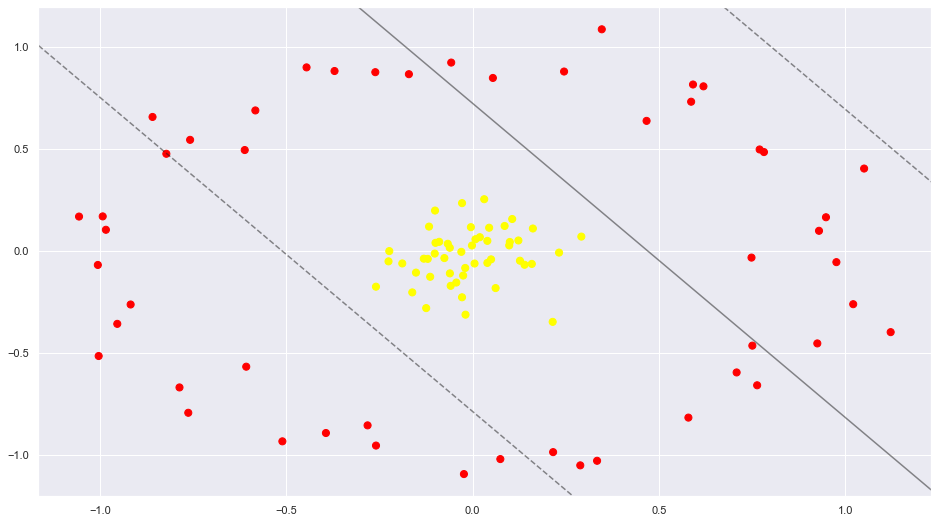

In [27]:
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Esta claro que el <i>Support Vector Classifier</i> no funciona en este caso, pero observemos que pasa si lo representamos en una dimensión mayor. Como se trata de un gráfico interactivo ejecuta las celdas para poder "jugar con él". 

In [28]:
r = np.exp(-(X ** 2).sum(1))
#r= 0.7

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
#from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
# NOTA: Si no tenéis la libreria ipywidgets instalada, podeís hacerlo con pip install ipywidgets 

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-20, 20], azim=(-20, 20),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-20, 20), value=-20), IntSlider(value=20, descript…

Podemos ver que con esta dimensión adicional los datos se vuelven trivialmente separables linealmente, dibujando un plano de separación en, digamos, r = 0,7.
Aquí tuvimos que elegir y ajustar cuidadosamente nuestra proyección: si no hubiéramos centrado nuestra función de base radial en la ubicación correcta no hubiéramos visto resultados tan limpios y linealmente separables. En general, la necesidad de hacer tal elección es un problema: nos gustaría de alguna manera encontrar automáticamente las mejores funciones de base para usar.
Una estrategia para este fin es calcular una función base centrada en cada punto del conjunto de datos y dejar que el algoritmo SVM revise los resultados. Este tipo de transformación de función de base se conoce como transformación de kernel, ya que se basa en una relación de similitud (o kernel) entre cada par de puntos.
Un problema potencial con esta estrategia es proyectar N puntos en N dimensiones ya que podría volverse muy intensiva en computación a medida que N crece. Sin embargo, debido a un pequeño y prolijo procedimiento conocido como el truco del kernel, se puede realizar un ajuste en los datos transformados del kernel de manera implícita, es decir, ¡sin construir nunca la representación N-dimensional completa de la proyección del kernel! Este truco del kernel está integrado en SVM y es una de las razones por las que el método es tan poderoso. <br>
En Scikit-Learn, podemos aplicar SVM kernelizado simplemente cambiando nuestro kernel lineal a un kernel RBF (función de base radial). 

### Aplicación del Kernel SVM al reconocimiento de caras
Tengamos el siguiente dataset: 

In [30]:
people = fetch_lfw_people(min_faces_per_person=60)
#print(faces.target_names)
#print(faces.images.shape)


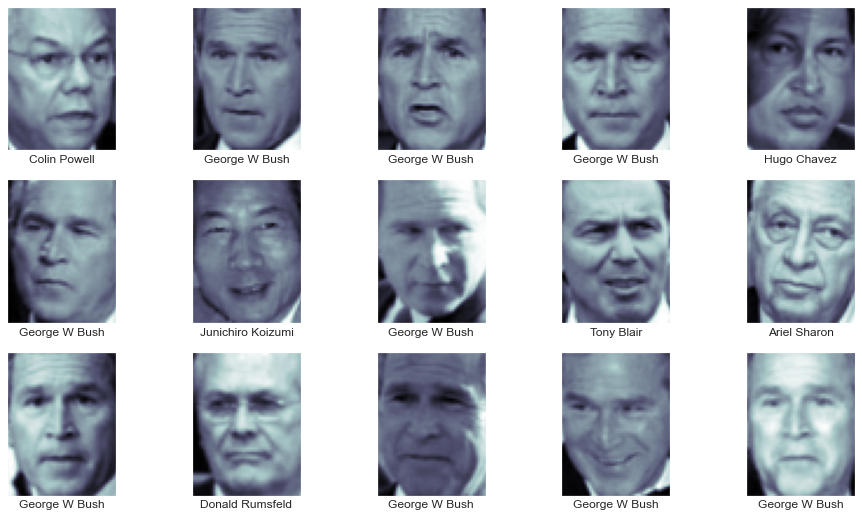

In [31]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(people.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=people.target_names[people.target[i]])

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> <br>
Cada imagen contiene [62 × 47] o casi 3000 píxeles. Podríamos proceder simplemente usando cada valor de píxel como una característica, pero a menudo es más efectivo usar algún tipo de preprocesador para extraer características más significativas; aquí usaremos un análisis de componentes principales para extraer 150 componentes fundamentales para alimentar a nuestro clasificador de máquinas de vectores de soporte (podemos usar <i>RandomizedPCA</i>). <br>
 
Podemos hacer esto de manera sencilla empaquetando el preprocesador y el clasificador en un único pipeline. Implementa el SVM siguiendo los siguientes pasos: <br>
- Con RandomizedPCA realiza un PCA de 150 componentes con <i>whiten=True</i> <br>
- Realiza un SVM con un kernel lineal y balanceado (podéis usar <i>class_weight)</i> <br>
- Una vez realizado esto divide los datos en train y test <br>
- Utiliza <i>GridSearchCV</i> para explorar combinaciones de hiperparámetros (<i>C</i> y <i>gamma</i>). <i>C</i> controla la dureza del margen y <i>gamma</i> controla el tamaño del núcleo de la función de base radial. Determina el mejor modelo (prueba por ejemplo con <i>C</i>= [1,5,10,50] y <i>gamma</i>=[0.0001,0.0005,0.001,0.005] <br>
- Con el mejor conjunto de hiperparámetros haz la predicción para los datos de test <br>
- Grafica las imágenes de test y sus valores predichos <br>
- Por último crea un <i>classification_report</i> y grafica la matriz de confusión.
    
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

In [32]:
from sklearn.utils import class_weight

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = people.target
target_names = people.target_names
n_classes = target_names.shape[0]
n_samples, h, w = people.images.shape

print("Total dataset size:\n")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

Total dataset size:

n_samples: 1348
n_features: 2914
n_classes: 8


/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4 5 6 7], y=[1 1 3 ... 3 7 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [33]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
from time import time, sleep

n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = RandomizedPCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 1078 faces
done in 0.129s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.012s


In [34]:
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting the classifier to the training set
done in 38.981s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [35]:
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
done in 0.057s
                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.58      0.67        12
     Colin Powell       0.85      0.88      0.87        51
  Donald Rumsfeld       0.96      0.88      0.92        25
    George W Bush       0.83      0.97      0.89        98
Gerhard Schroeder       1.00      0.76      0.86        21
      Hugo Chavez       0.90      0.60      0.72        15
Junichiro Koizumi       1.00      0.80      0.89        10
       Tony Blair       0.92      0.87      0.89        38

         accuracy                           0.87       270
        macro avg       0.90      0.79      0.84       270
     weighted avg       0.88      0.87      0.87       270

[[ 7  1  0  4  0  0  0  0]
 [ 1 45  1  4  0  0  0  0]
 [ 0  2 22  1  0  0  0  0]
 [ 0  3  0 95  0  0  0  0]
 [ 0  0  0  2 16  1  0  2]
 [ 1  1  0  3  0  9  0  1]
 [ 0  1  0  1  0  0  8  0]
 [ 0  0  0  5  0  0  0 33]]


/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


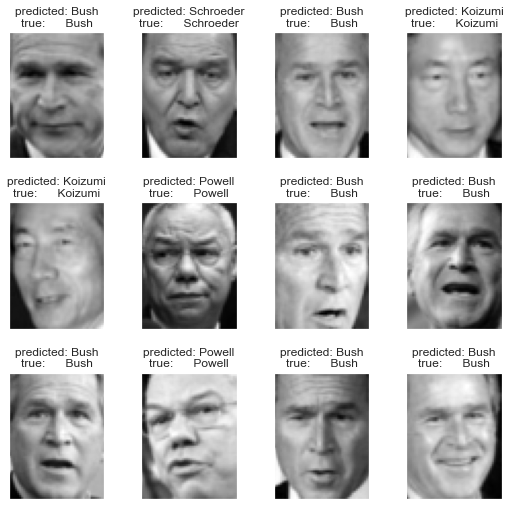

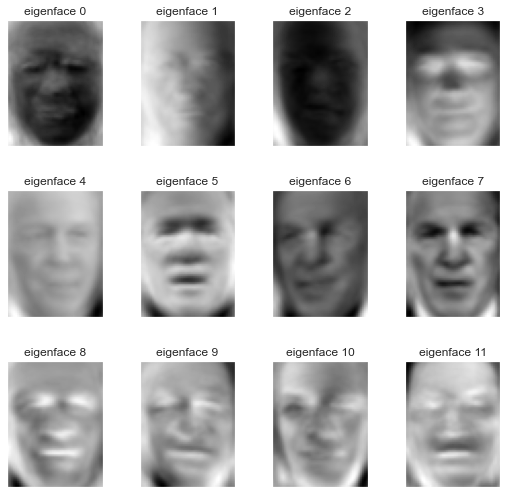

In [37]:
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

<i><b>Ayuda</b></i> [enlace 1](https://aiaspirant.com/machine-learning-pipeline/), [enlace2](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> <br>
A tenor de los resultados obtenidos, contesta a las preguntas: <br> 
- ¿Cuáles crees que son las principales ventajas y desventajas de este método? Razona la respuesta. <br>
- Comenta algunas aplicaciones en las que crees que sería buen método usar un SVM. Razona la respuesta. 
    
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

Ventajas: 

- Trabaja bien cuando existe un claro maren de separación entre las clases
- Efectivo en espacios multidimensionales
- Efectivo en casos donde el numero de dimensiones es superior al numero de muestras

Desventajas:

- Algoritmo no muy adecuado para conjuntos de datos grandes
- No es muy eficiente cuando el dataset tiene ruido
- En los casos en que el número de características para cada punto de datos exceda el número de muestras de datos de entrenamiento, el SVM tendrá un rendimiento inferior.
- Como el clasificador de vectores de soporte funciona poniendo puntos de datos, por encima y por debajo del hiperplano de clasificación no hay una explicación probabilística para la clasificación.


Son varias las posibles aplicaciones de SVM:

- Detección de caras
- Categorización de texto: Las SVM permiten la categorización de texto e hipertexto para modelos inductivos y transductivos. Usan datos de entrenamiento para clasificar documentos en diferentes categorías. Se clasifica en función de la puntuación generada y luego se compara con el valor umbral.
- Clasificación de imagenes
- Bioinformática: Incluye clasificación de proteínas y clasificación de cáncer. Usamos SVM para identificar la clasificación de genes, pacientes sobre la base de genes y otros problemas biológicos.
- Reconocimiento de la escritura a mano
- Generalized Predictive Control: Utilice GPC basado en SVM para controlar la dinámica caótica con parámetros útiles.

- Ciencias ambientales


Fuente: https://data-flair.training/blogs/applications-of-svm/#:~:text=We%20use%20SVM%20for%20identifying,recognize%20handwritten%20characters%20used%20widely.

# 3. Árboles de decisión (2 puntos)

Los árboles de decisión son modelos predictivos formados por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta.

Muchos métodos predictivos generan modelos globales en los que una única ecuación se aplica a todo el espacio muestral. Cuando el caso de uso implica múltiples predictores que interaccionan entre ellos de forma compleja y no lineal, es muy difícil encontrar un único modelo global que sea capaz de reflejar la relación entre las variables. Los métodos estadísticos y de machine learning basados en árboles engloban a un conjunto de técnicas supervisadas no paramétricas que consiguen segmentar el espacio de los predictores en regiones simples, dentro de las cuales es más sencillo manejar las interacciones. Es esta característica la que les proporciona gran parte de su potencial.

La principal implementación de árboles de decisión en Python está disponible en la librería scikit-learn a través de las clases DecisionTreeClassifier (si tenemos un problema de clasificación) y DecisionTreeRegressor (si tenemos un problema de regresión). Aplicaremos un árbol de regresión si nuestra variable respuesta es continua,y un árbol de clasificación cuando nuestra variable sea categórica.  **Una característica importante para aquellos que han utilizado otras implementaciones es que, en scikit-learn, es necesario convertir las variables categóricas en variables dummy (one-hot-encoding).** <br>

En el campo del aprendizaje automático hay distintas maneras de obtener árboles de decisión, la que usaremos en esta ocasión es conocida como CART: Classification And Regression Trees.

<br>**Contrucción de un árbol**<br>
La creación de las ramificaciones de los árboles se consigue mediante el algoritmo de <i>recursive binary splitting</i>. Este algoritmo consta de tres pasos principales: 
- El proceso se inicia en lo más alto del árbol, donde todas las observaciones pertenecen a la misma región
- Se identifican todos los posibles puntos de corte para cada uno de los predictores. En el caso de predictores cualitativos, los puntos de corte son cada uno de sus niveles. Para predictores continuos los valores de los puntos se ordenan de menor a mayor, y el punto intermedio entre cada par de valores se emplea como punto de corte.
- Se evaluan las posibles divisiones de cada predictor de acorde a una determinada medida RSS (Residual Sum of Squares) generalmente para regresión. Para clasificación se utilizan(classification error rate, Gini, entropía, chi-square). 

<br>**Evitando el overfitting**<br>
En el proceso de construcción de árboles descrito, el error de entrenamiento se reduce rápidamente  por lo que generalmente el modelo se ajusta muy bien a las observaciones empleadas como entrenamiento. Como consecuencia, los árboles de decisión tienden al <i>overfitting</i>. 
Tenemos dos estrategias para prevenir el problema:
- Limitar el tamaño del árbol (parada temprana)
- Podar el árbol (pruning)

### Aplicación: Predicción de ventas de sillas infantiles
El set de datos Carseats, original del paquete de R ISLR y accesible en Python a través de statsmodels.datasets.get_rdataset, contiene información sobre la venta de sillas infantiles en 400 tiendas distintas. Para cada una de las 400 tiendas se han registrado 11 variables. Pretendemos generar un modelo de clasificación que permita predecir si una tienda tiene ventas altas (Sales > 8) o bajas (Sales <= 8) en función de todas las variables disponibles.

In [38]:
# Cargamos nuestros datos
carseats = sm.datasets.get_rdataset("Carseats", "ISLR")
datos = carseats.data
#print(carseats.__doc__)

In [39]:
datos = carseats.data
column_names = ["Sales", "CompPrice", "Income", "Advertising", "Population", "Price", "ShelveLoc", "Age", "Education", "Urban", "US"]

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Haz una inspección rápida del dataset. Verás que la variable <i>Sales</i> es una variable continua. Nuestro objetivo es clasificar las tiendas según si venden mucho o poco, por lo que tendremos que modificar nuestra variable <i>Sales</i> conviertíendola en una variable categórica dicotómica (0,1) a la que llamaremos <i>ventas_altas</i>
</div>

In [40]:
carseats_df = pd.DataFrame(data= np.c_[carseats['data']])
carseats_df.columns = ["Sales", "CompPrice", "Income", "Advertising", "Population", "Price", "ShelveLoc", "Age", "Education", "Urban", "US"]
carseats_df['ventas_altas'] = carseats_df.Sales.map(lambda x: 1 if x>8 else 0)
carseats_df.head(10)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ventas_altas
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,1
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No,0
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes,1
8,6.54,132,110,0,108,124,Medium,76,10,No,No,0
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes,0


### Ajuste del modelo

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Ajustaremos el árbol de clasificación empleando como variable respuesta <i>ventas_altas</i> y como predictores todas las variables disponibles.  
<b>NOTA: Recuerda que tenemos variables categóricas por lo que antes de entrenar el modelo deberemos de aplicar one-hot encoding</b>

Pasos a seguir:
- Divide los datos en train y test
- Aplica one-hot-encoding a las columnas categóricas (consejo: podemos definir un objeto ColumnTransformer)
- Una vez que hemos creado el objeto ColumnTransformer y hemos aplicado el one-hot-encoding, aplícalo a los dos conjuntos (train y test). 

    <i> Ayuda</i>: El resultado que devuelve ColumnTransformer es un numpy array, por lo que se pierden los nombres de las columnas. Por tanto es interesante poder inspeccionar como queda el set de datos tras este preprocesado. Por defecto la función <i>OneHotEncoder</i> ordena las nuevas columnas de izquierda a derecha en orden alfabético.
<br>[one-hot-encoding](https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b)<br>
[column_transformer](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)
</div> 

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

In [41]:
carseats_df.ShelveLoc = pd.factorize(carseats_df.ShelveLoc)[0]
carseats_df.Urban = carseats_df.Urban.map({'No':0, 'Yes':1})
carseats_df.US = carseats_df.US.map({'No':0, 'Yes':1})
carseats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sales         400 non-null    object
 1   CompPrice     400 non-null    object
 2   Income        400 non-null    object
 3   Advertising   400 non-null    object
 4   Population    400 non-null    object
 5   Price         400 non-null    object
 6   ShelveLoc     400 non-null    int64 
 7   Age           400 non-null    object
 8   Education     400 non-null    object
 9   Urban         400 non-null    int64 
 10  US            400 non-null    int64 
 11  ventas_altas  400 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 37.6+ KB


/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
X = carseats_df.drop(['Sales', 'ventas_altas'], axis=1)
y = carseats_df.ventas_altas
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

In [43]:
X_test = X_test.fillna(X_train.mean())


In [44]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

### Creación del árbol
Para crear el árbol de decisión utilizaremos los hiperparámetros <i>max_depth=4</i> y <i>criterion='gini'</i>, el resto de hiperparámetros los dejaremos por defecto.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Crea el árbol y entrena el modelo. Grafica la estructura del árbol creado.  
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


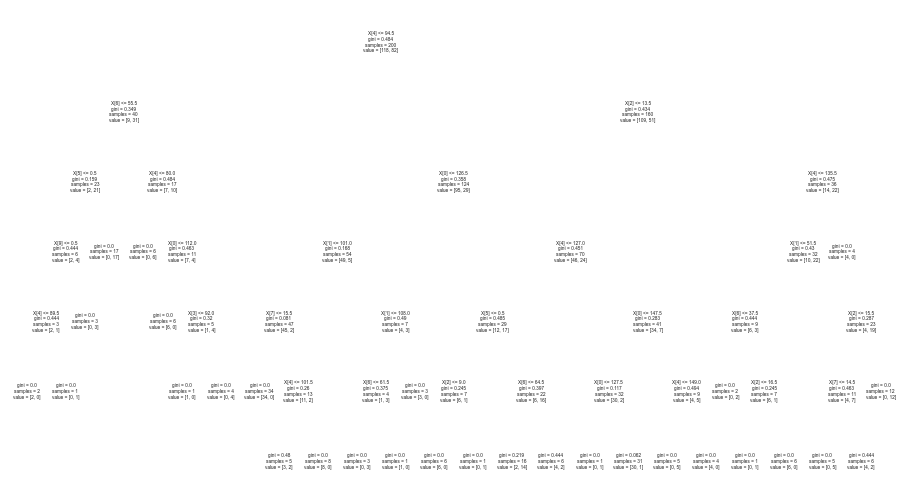

In [45]:
plot_tree(clf);


In [46]:
text_representation = export_text(clf)
print(text_representation)

|--- feature_4 <= 94.50
|   |--- feature_6 <= 55.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- feature_9 <= 0.50
|   |   |   |   |--- feature_4 <= 89.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  89.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_9 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_5 >  0.50
|   |   |   |--- class: 1
|   |--- feature_6 >  55.50
|   |   |--- feature_4 <= 80.00
|   |   |   |--- class: 1
|   |   |--- feature_4 >  80.00
|   |   |   |--- feature_0 <= 112.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  112.00
|   |   |   |   |--- feature_3 <= 92.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  92.00
|   |   |   |   |   |--- class: 1
|--- feature_4 >  94.50
|   |--- feature_2 <= 13.50
|   |   |--- feature_0 <= 126.50
|   |   |   |--- feature_1 <= 101.00
|   |   |   |   |--- feature_7 <= 15.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  15.50
|   | 

### Predicción y evaluación del modelo
Vamos a evaluar la capacidad predictiva de nuestro árbol. Para ello calcularemos y graficaremos la matriz de confusión y calcularemos el <i>accuracy</i> en el conjunto de test.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Calcula y grafica la matriz de confusión y calcula la precisión de nuestro modelo 
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

In [47]:
pred = clf.predict(X_test)

print("Matriz de confusión:\n")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

print("Score:\n")
score = clf.score(X_train, y_train)

print("The score is: ", score)


Matriz de confusión:

[[100  18]
 [ 32  50]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       118
           1       0.74      0.61      0.67        82

    accuracy                           0.75       200
   macro avg       0.75      0.73      0.73       200
weighted avg       0.75      0.75      0.75       200

Score:

The score is:  0.955


### Podado del árbol (pruning)
Hemos empleado un valor de <i>max_depth=5</i>, pero este valor no tiene por qué ser el mejor valor. Vamos a someter al árbol a un proceso de <i>pruning</i> con el objetivo de identificar la profundidad óptima que consiga reducir la varianza y aumentar la capacidad predictiva del modelo. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> 
<br>- Poda el árbol usando diferentes valores de <i>ccp_alpha</i>. En concreto 0, 5 y 10.
<br>- Calcula la precisión del árbol con una <i>cross-fold-validation</i> de 10.
<br>- Grafica el error de la validación cruzada versus el hiperparámetro <i>ccp_alpha</i>.
<br>- ¿Cuál es el mejor valor ccp_alpha encontrado?
<br>- Después de la poda ¿cuál es la profundidad del árbol? ¿Cuál es el número de nodos terminales en este caso?
<br>- Vuelve a calcular la accuracy en test. ¿Cuál ha sido la variación del porcentaje de acierto entre el árbol podado y sin podar?<br>
<i><b>Ayuda</b></i>: Para evaluar los valores de cpp_alpha utiliza <i>param_grid</i> y . Para el modelo <i>GridSearchCV</i> <br> 
<i><b>Ayuda</b></i>: Una vez identificado el valor óptimo de ccp_alpha, se reentrena el árbol indicando este valor en sus argumentos. Si en el GridSearchCV() se indica refit=True, este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en .best_estimator_. <br>
  
https://ranvir.xyz/blog/practical-approach-to-tree-pruning-using-sklearn/ <br>
https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html <br>
</div>


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

In [48]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
path

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'ccp_alphas': array([0.        , 0.00357447, 0.00608696, 0.0075    , 0.008     ,
        0.00857143, 0.00857143, 0.00907258, 0.00936072, 0.00985507,
        0.01142857, 0.01280303, 0.01449638, 0.01570652, 0.01680556,
        0.01813704, 0.01964939, 0.02420672, 0.03970453, 0.0666125 ]),
 'impurities': array([0.06584409, 0.07299302, 0.09125389, 0.09875389, 0.10675389,
        0.11532532, 0.12389675, 0.13296933, 0.15169076, 0.17140091,
        0.18282948, 0.19563251, 0.23912164, 0.25482816, 0.27163372,
        0.28977075, 0.32906953, 0.37748297, 0.4171875 , 0.4838    ])}

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'total impurity of leaves')

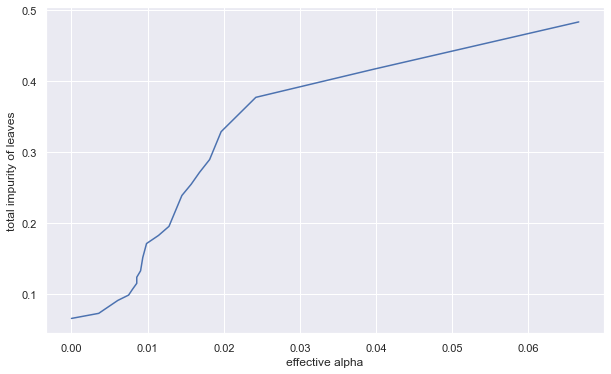

In [49]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'total depth')

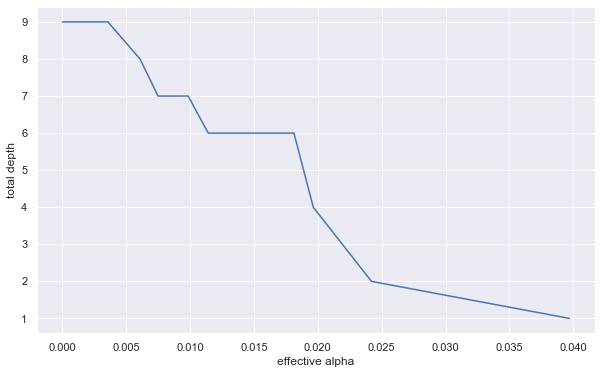

In [50]:
#Finding optimal value of alpha

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
    
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Accuracy scores')

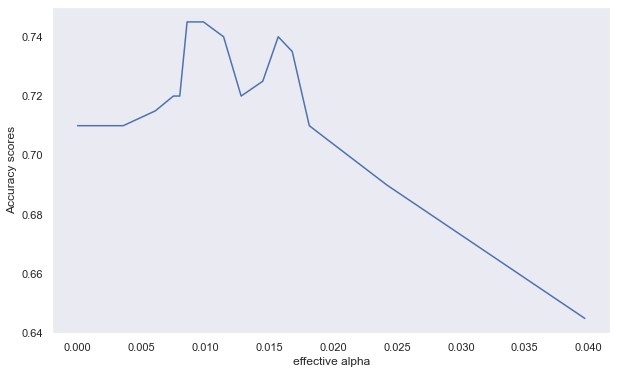

In [51]:
#Relation between alpha and accuracy

from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

### Importancia de los predictores
La importancia de cada predictor en el modelo se calcula como la reducción total (normalizada) en el criterio de división, en este caso el índice Gini. Si un predictor no ha sido seleccionado en ninguna divisón, no se ha incluido en el modelo y por lo tanto su importancia es 0.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> 
Calcula la importancia de los predictores<br>    
    <i><b>Ayuda: </b></i> <br>
https://machinelearningmastery.com/calculate-feature-importance-with-python/) <br>
https://www.scikit-yb.org/en/latest/api/model_selection/importances.html) <br>
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

### Predicciones
En el ejemplo anterior, al aplicar <i>.predict()</i> se devuelve  1  (ventas elevadas) ó  0  (ventas bajas) para cada observación de test. Sin embargo, no se dispone de ningún tipo de información sobre la seguridad con la que el modelo realiza esta asignación. Con <i>.predict_proba()</i>, en lugar de una clasificación, se obtiene la probabilidad con la que el modelo considera que cada observación puede pertenecer a cada una de las clases. <br>

Supóngase el siguiente escenario: la campaña de navidad se aproxima y los propietarios de la cadena quieren duplicar el stock de artículos en aquellas tiendas de las que se prevee que tengan ventas elevadas. Como el transporte de este material hasta las tiendas supone un coste elevado, el director quiere limitar esta estrategia únicamente a tiendas para las que se tenga mucha seguridad de que van conseguir muchas ventas. <br>

Si se dispone de las probabilidades se puede establecer un punto de corte concreto, por ejemplo, considerando únicamente como clase  1  (ventas altas) aquellas tiendas cuya predicción para esta clase sea superior al 0.8 (80%). De esta forma, la clasificación final se ajusta mejor a las necesidades del caso de uso.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> 
Saca la tabla de valores de predicción para el caso normal (50%) y para el escenario de la campaña de Navidad (que la clase 1 sea superior a 80%). <br> 
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> 
Una vez estudiado el algoritmo de los árboles de decisión contesta a las siguientes preguntas: <br>
- Describe los hiperparámetros más importantes de este algoritmo y explica que influencia tiene cada uno en los resultados. <br>
- ¿Cuáles son las principales ventajas y desventajas de este algoritmo? <br>
- Comenta algún tipo de aplicación donde sería conveniente utilizar árboles de decisión. Razona la respuesta
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

# 4. Gaussian Naive Bayes (2.5 puntos)
Hasta el momento hemos visto diversos algoritmos supervisados de aprendizaje automático que nos dejan clasificar datos y/o obtener predicciones o asistencia a la toma de decisiones (árbol de decisión, kNN, SVM). Por lo general esos algoritmos intentan minimizar algún tipo de coste iterando las entradas y las salidas y ajustando internamente las “pendientes” ó “pesos” para hallar una salida. Esta vez, el algoritmo que usaremos se basa completamente en teoría de probabilidades.
En este caso vamos a utilizar el algoritmo de Naive-Bayes para ver si en los tiempos que corren es conveniente comprar o alquilar una casa. 
Para ello cargemos el dataset que vamos a utilizar:

In [62]:
dataframe = pd.read_csv(r"comprar_alquilar.csv")
dataframe.head(10)
# REFERENCIAS:
# ingresos y gastos son mensuales de 1 personas o 2 si están casados.
# trabajo: 0-sin trabajo 1-autonomo 2-asalariado 3-empresario 4-Autonomos 5-Asalariados 6-Autonomo y Asalariado 7-Empresario y Autonomo 8 Empresarios o empresario y autónomo
# estado_civil: 0-soltero 1-casado 2-divorciado
# hijos: Cantidad de hijos menores (no trabajan)
# comprar: 0-mejor alquilar 1-Comprar casa
# hipoteca fija a 30 años con interes

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


Si nos fijamos en nuestro dataset, éste tiene la siguiente información: 
- ingresos: los ingresos de la familia mensual <br>
- gastos comunes: pagos de luz, agua, gas, etc mensual <br>
- pago coche: si se está pagando cuota por uno o más coches, y los gastos en combustible, etc al mes. <br>
- gastos_otros: compra en supermercado y lo necesario para vivir al mes <br>
- ahorros: suma de ahorros dispuestos a usar para la compra de la casa. <br>
- vivienda: precio de la vivienda que quiere comprar esa familia <br>
- estado civil: <br>
    0-soltero <br> 
    1-casados <br>
    2-divorciados <br>
- hijos: cantidad de hijos menores y que no trabajan. <br>
- trabajo: <br> 
    0-sin empleo <br>
    1-autónomo (freelance) <br>
    2-empleado <br>
    3-empresario <br>
    4-pareja: autónomos <br>
    5-pareja: empleados <br>
    6-pareja: autónomo y asalariado <br>
    7-pareja:empresario y autónomo <br>
    8-pareja: empresarios los dos o empresario y empleado <br>
- comprar: <br>
    0-No comprar <br>
    1-Comprar (esta será nuestra columna de salida, para aprender) <br>

Además vamos a realizar las siguientes suposiciones: 
- Nos va a dar igual en que moneda sea
- No vamos a tener en cuenta ubicación geográfica aún cuando sabemos que los precios dependerán mucho de la zona en la que se ubiquen
- Como la mayoría somos mil euristas vamos a suponer que tenemos una hipoteca fija a 30 años con interés de mercado “bajo”.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> <br>
- Muestra la cantidad de muestras de alquilar o vender que tenemos <br>
- Haz histogramas de cada una de las características quitando la columna de los resultados (comprar). Y comenta los resultados. 
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

In [63]:
print(len(dataframe[dataframe["comprar"]==1].values), len(dataframe[dataframe["comprar"]==0].values))

67 135


/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


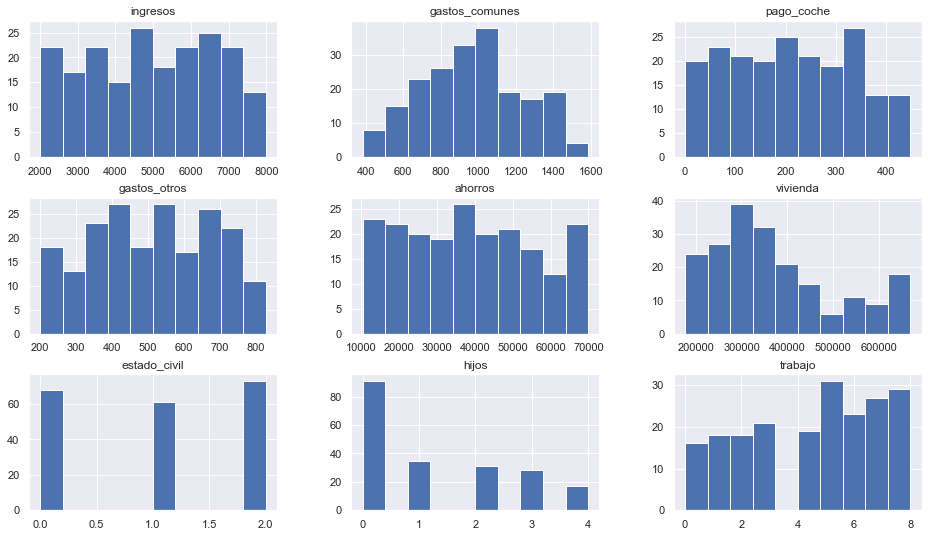

In [64]:
dataframe.drop("comprar", axis=1).hist()
plt.show()

### Preprocesemos los datos
Vamos a realizar un pequeño preprocesado de los datos con el objetivo de agrupar información

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> <br>
- Agrupa los diversos gastos mensuales (pago coche + gastos_comunes + gastos_otros) <br>
- Calcula el montante a financiar. Para ello crea una columna llamada financiar que será la resta del precio de la vivienda con los ahorros de la familia. <br>
- Vuelve a mostrar el dataframe reducido.  <br>
- Muestra un resumen estadístico de las variables. Comenta los resultados. 
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

In [65]:
dataframe["gastos"] = dataframe[["gastos_otros", "gastos_comunes", "pago_coche"]].sum(axis=1)
dataframe["financiar"] = [b-a for b, a in zip(dataframe["vivienda"].values, dataframe["ahorros"].values)]
dataframe.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,1000,0,600,50000,400000,0,2,2,1,1600,350000
1,6745,944,123,429,43240,636897,1,3,6,0,1496,593657
2,6455,1033,98,795,57463,321779,2,1,8,1,1926,264316
3,7098,1278,15,254,54506,660933,0,0,3,0,1547,606427
4,6167,863,223,520,41512,348932,0,0,3,1,1606,307420


In [66]:
dataframe.describe()

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683,1698.752475,334599.970297
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988,324.838005,126607.099497
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000,1007.000000,154716.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000,1430.500000,240410.250000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000,1669.500000,301177.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000,1928.000000,393413.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000,2543.000000,618621.000000


### Feature selection

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> <br>
En este caso es interesante ver qué características son las más relevantes para tomar la trascendente decisión de si al final compramos el piso o es preferible alquilar. Para ello haremos lo siguiente: <br>
- Muestra la correlación entre las columnas (preferiblemente usando la librería seaborn) <br>
- Selecciona las 5 "mejores" características para usar. Para ello usaremos la clase  SelectKBest. Estas 5 características serán las que "más aportan" al momento de clasificar. <br>
- Muestra la correlación de las 5 caracterísitcas elegidas. <br>
- Por último crea su pairpolot <br>
Comenta todos los resultados. 
</div>

[Enlace a SelectkBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

In [67]:
dataframe.corr()

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
ingresos,1.000000,0.560211,-0.109780,-0.124105,0.712889,0.614721,-0.042556,-0.024483,-0.038852,0.467123,0.362823,0.564351
gastos_comunes,0.560211,1.000000,-0.054400,-0.099881,0.209414,0.204781,-0.057152,-0.072321,-0.079095,0.200191,0.765056,0.191851
pago_coche,-0.109780,-0.054400,1.000000,0.010602,-0.193299,-0.094631,0.052239,-0.044858,0.018946,-0.196468,0.344543,-0.075416
gastos_otros,-0.124105,-0.099881,0.010602,1.000000,-0.064384,-0.054577,-0.020226,0.124845,0.047313,-0.110330,0.437909,-0.049955
ahorros,0.712889,0.209414,-0.193299,-0.064384,1.000000,0.605836,-0.063039,0.001445,-0.023829,0.340778,0.067753,0.515402
vivienda,0.614721,0.204781,-0.094631,-0.054577,0.605836,1.000000,-0.113420,-0.141924,-0.211790,-0.146092,0.106897,0.994028
estado_civil,-0.042556,-0.057152,0.052239,-0.020226,-0.063039,-0.113420,1.000000,0.507609,0.589512,0.142799,-0.038249,-0.113521
hijos,-0.024483,-0.072321,-0.044858,0.124845,0.001445,-0.141924,0.507609,1.000000,0.699916,0.272883,-0.013228,-0.153068
trabajo,-0.038852,-0.079095,0.018946,0.047313,-0.023829,-0.211790,0.589512,0.699916,1.000000,0.341537,-0.034484,-0.224855
comprar,0.467123,0.200191,-0.196468,-0.110330,0.340778,-0.146092,0.142799,0.272883,0.341537,1.000000,0.035032,-0.204099


/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


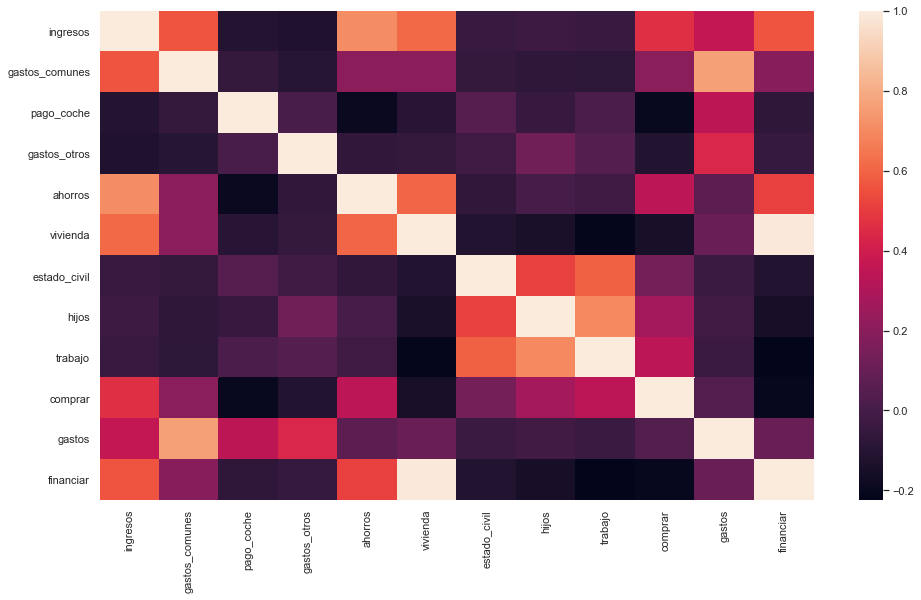

In [68]:
sns.heatmap(dataframe.corr());

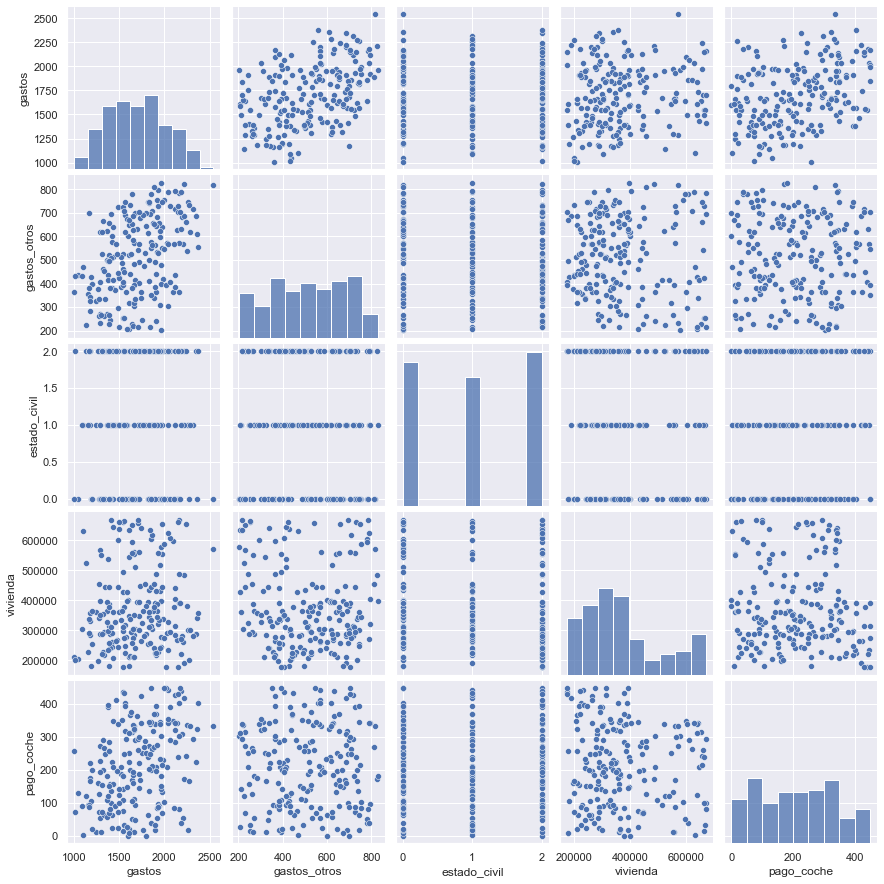

In [69]:
from sklearn.feature_selection import SelectKBest, chi2
X = dataframe.drop("comprar", axis=1)
y = dataframe["comprar"]
best = SelectKBest(k="all")
best.fit_transform(X, y)


best_colums = np.array(X.columns)[np.argsort(best.scores_)][0:5]

df_best = X[best_colums]

sns.pairplot(df_best)


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> <br>
Con el objetivo de inferir en este estadio algo de información, grafica la frontera de decisión de dos de sus características (por ejemplo ingresos y financiar). Comenta el resultado. <br>
<i><b>Ayuda</b></i> : Fíjate en cómo se han dibujado las fronteras de decisión de los apartados anteriores. 
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

### Creando el modelo de Gaussian Naive Bayes

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> <br>
- Divide el dataframe reducido en entrenamiento y test (80/20). <br>
- Entrena el modelo. Para ello instacia el clasificador <i>GaussianNB</i> y entrénalo. <br>
- Calcula la predicción en train y en test. <br>
- Muestra el total de muestras en test y los fallos que el clasificador ha realizado. <br>
- Calcula y grafica la matriz de confusion y crea un classification_report. 
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

In [70]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


X_train, X_test, y_train, y_test = train_test_split(
     df_best, y, test_size=0.2, random_state=42)

clf = GaussianNB()
clf.fit(X_train, y_train)

print("train", clf.score(X_train, y_train))
print("test", clf.score(X_test, y_test))


train 0.7453416149068323
test 0.6585365853658537


/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
from sklearn.metrics import confusion_matrix

len(y_test), confusion_matrix(clf.predict(X_test), y_test)

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(41,
 array([[20, 10],
        [ 4,  7]]))

### Realicemos nuevas predicciones

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> <br>
Vamos a realizar diversos supuestos para ver qué es lo que nos recomienda nuestro clasificador. Alquilar (0) y comprar (1). <br>
<b>Caso 1</b>: Familia con unos ingresos de 2000€ y unos ahorros de 5000€, cuya pareja son empresearios y no tienen hijos. Necesitarían para tener la casa de sus sueños una financiación de 200000€. <br>
<b>Caso 2</b>: Familia con unos ingresos de 6000€ y unos ahorros de 34000€, cuya pareja uno es asalariado y el otro autónomo con dos hijos a su cargo. Necesitarían para tener la casa de sus sueños una financiación de 320000€. <br>
<b>Caso 3</b>: Una mujer divorciado con unos ingresos de 9000€ y unos ahorros de 22500€ , con un hijo a su cargo y de profesión autónoma. Necesitaría una financiación de 39000€. <br>
Comenta los resultados obtenidos y razona en base a tu opinión si crees que el clasificador ha tomado una buena o mala decisión. Atrévete a realizar nuevos pronósticos. Ya tienes un simulador. 

</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

In [72]:
dataframe.head()

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,1000,0,600,50000,400000,0,2,2,1,1600,350000
1,6745,944,123,429,43240,636897,1,3,6,0,1496,593657
2,6455,1033,98,795,57463,321779,2,1,8,1,1926,264316
3,7098,1278,15,254,54506,660933,0,0,3,0,1547,606427
4,6167,863,223,520,41512,348932,0,0,3,1,1606,307420


In [73]:
#ENTRENAR CON TODA LA X Y TODA Y

X = dataframe[["ingresos", "ahorros", "trabajo", "hijos", "financiar", "estado_civil"]]


####AQUI####
clf.fit(X, y)

print(clf.predict(np.array([2000, 5000, 3, 0, 2000000, 1]).reshape(1, -1)))
print(clf.predict(np.array([6000, 34000, 6, 2, 320000, 1]).reshape(1, -1)))
print(clf.predict(np.array([9000, 22500, 1, 1, 390000, 2]).reshape(1, -1)))

[0]
[1]
[0]


/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> <br>
- Visto los resultados obtenidos, ¿cuáles crees que son las principales ventajas e inconvenientes del algoritmo? <br>
- Comenta qué tipo de aplicaciones serían las idóneas para utilizar el algoritmo de Naive-Bayes. Razona la respuesta.

</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>

# Estudio de las fronteras de decisión (1.5 puntos)
Para este ejercicio vamos a usar una librería de Python que nos realizará de forma automática las fronteras de decisión. En este ejercicio deberéis visualizar dichas fronteras y analizarlas. Se trata de un ejercicio de análisis, por lo que se valorará el grado de concreción realizado en él. <br>
Vuestro análisis debería de constar al menos de: <br>
- Tipo de frontera de decisión (radial, lineal, no lineal...) <br>
- Forma de dicha frontera (por qué es de esa forma) <br>
- Qué información nos está dando la frontera con respecto a nuestro dataset <br>
- ¿Te esperabas ese tipo de frontera o pensabas que era de otra manera? <br>
- ¿Es una frontera suave o abrupta? ¿por qué? <br>
- etc.. <br>

Para ello instalamos la librería [machlearn](https://pypi.org/project/machlearn/) mediante <i>pip install machlearn</i>. <br>
<b>NOTA: Si estáis utilizando el mismo environment Python para otras asignaturas os recomiendo que os creéis uno nuevo (con los mismos paquetes que tenéis instalados para la asignatura, esto lo podemos hacer desde <i>Reply Environment</i> desde Anaconda) puesto que la librería instala y desinstala ciertas versiones de algunas librerias usuales. </b>

Esta librería aparte de darnos la frontera de decisión nos proporciona más información que os puede ayudar a la hora del análisis

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> <br>
Una vez instalada la libreria machlearn, vamos a trabajar con el dataset <i>Social Network Ads</i>. El objetivo de este dataset es el estudio por parte de una empresa de los grupos de personas a los que debían publicitarles más en función del sexo, edad y salario estimado. Ejecutaremos las siguientes celdas.

</div>

In [ ]:
from machlearn import kNN
kNN.demo("Social_Network_Ads")

In [ ]:
from machlearn import naive_bayes as nb
nb.demo("Social_Network_Ads")

In [ ]:
from machlearn import SVM
SVM.demo("Social_Network_Ads")

In [ ]:
from machlearn import decision_tree as DT
DT.demo("Social_Network_Ads", classifier_func = "DT")

In [ ]:
from machlearn import logistic_regression as log_reg
log_reg.demo("Social_Network_Ads")

In [ ]:
from machlearn import neural_network as NN
NN.demo("Social_Network_Ads")

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> <br>
Una vez ejecutadas todas las celdas. Analiza dichas fronteras
</div>

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Solución:</strong>
</div>